**Please Note that this file should be opened in Google Collab Along with ML Case Study.xlsx file Uploaded**

**1.Import the datasets and libraries, check datatype, statistical summary,shape, null values or incorrect imputation**

In [41]:
#Pandas display settings, decimals, scientfic notation removals, Increase cell width, charts, 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container {width : 98% !important; }</style>"))
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10,10]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import warnings
warnings.filterwarnings('ignore')

In [42]:
data = pd.read_excel('/content/ML Case Study.xlsx','Data')

In [43]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [44]:
from scipy import stats
from sklearn import metrics

**2. EDA: Study the data distribution in each attribute and target variable, share your findings**

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [46]:
len(data['Mortgage']) - np.count_nonzero(data['Mortgage']) # No.of people with Zero Mortgages

3462

In [47]:
len(data['CreditCard']) - np.count_nonzero(data['CreditCard']) # No.of People with Zero CreditCard

3530

In [48]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,"5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00"
mean,"2,500.50",45.34,20.10,73.77,"93,152.50",2.40,1.94,1.88,56.50,0.10,0.10,0.06,0.60,0.29
std,"1,443.52",11.46,11.47,46.03,"2,121.85",1.15,1.75,0.84,101.71,0.29,0.31,0.24,0.49,0.46
min,1.00,23.00,-3.00,8.00,"9,307.00",1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,250.75",35.00,10.00,39.00,"91,911.00",1.00,0.70,1.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"2,500.50",45.00,20.00,64.00,"93,437.00",2.00,1.50,2.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,"3,750.25",55.00,30.00,98.00,"94,608.00",3.00,2.50,3.00,101.00,0.00,0.00,0.00,1.00,1.00
max,"5,000.00",67.00,43.00,224.00,"96,651.00",4.00,10.00,3.00,635.00,1.00,1.00,1.00,1.00,1.00


In [49]:
!pip install pandas==0.25

In [50]:
from pandas_profiling import ProfileReport #Number of unique in each column

In [51]:
ProfileReport(data).to_file('Profile.html')

In [52]:
data.shape

(5000, 14)

In [53]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [54]:
#data.drop('Age',axis = 1 inplace = True)

In [55]:
data['Age'].value_counts(normalize=False)

35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

In [56]:
data['Age'].nunique

<bound method IndexOpsMixin.nunique of 0       25
1       45
2       39
3       35
4       35
        ..
4995    29
4996    30
4997    63
4998    65
4999    28
Name: Age, Length: 5000, dtype: int64>

In [57]:
data['Age'].unique

<bound method Series.unique of 0       25
1       45
2       39
3       35
4       35
        ..
4995    29
4996    30
4997    63
4998    65
4999    28
Name: Age, Length: 5000, dtype: int64>

In [58]:
for i in list(data.columns): #Value counts of all categorical columns. 
  print(data[i].value_counts(normalize = True))
  print()

2047   0.00
2608   0.00
4647   0.00
2600   0.00
553    0.00
       ... 
3263   0.00
1218   0.00
3267   0.00
1222   0.00
2049   0.00
Name: ID, Length: 5000, dtype: float64

35   0.03
43   0.03
52   0.03
58   0.03
54   0.03
50   0.03
41   0.03
30   0.03
56   0.03
34   0.03
39   0.03
59   0.03
57   0.03
51   0.03
60   0.03
45   0.03
46   0.03
42   0.03
40   0.03
31   0.03
55   0.03
62   0.02
29   0.02
61   0.02
44   0.02
32   0.02
33   0.02
48   0.02
38   0.02
49   0.02
47   0.02
53   0.02
63   0.02
36   0.02
37   0.02
28   0.02
27   0.02
65   0.02
64   0.02
26   0.02
25   0.01
24   0.01
66   0.00
23   0.00
67   0.00
Name: Age, dtype: float64

 32   0.03
 20   0.03
 9    0.03
 5    0.03
 23   0.03
 35   0.03
 25   0.03
 28   0.03
 18   0.03
 19   0.03
 26   0.03
 24   0.03
 3    0.03
 14   0.03
 16   0.03
 30   0.03
 34   0.03
 27   0.03
 17   0.03
 29   0.02
 22   0.02
 7    0.02
 8    0.02
 6    0.02
 15   0.02
 10   0.02
 33   0.02
 13   0.02
 11   0.02
 37   0.02
 36   0.02
 21   0.02

In [59]:
#data['Credit'].fillna(0,inplace = True) To fill missing values

In [60]:
#data.groupby('Gender')[''].mean()
#data.groupby(['Loan_Status', 'Gender', 'Property_Area'])['Married'].value_counts()

**3. Split the data into training and test set in the ratio of 70:30 respectively.**

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn import naive_bayes
from sklearn.ensemble import RandomForestClassifier

In [62]:
LR_model = LogisticRegression()
x = data.drop('Personal Loan',axis = 1) 
y = data['Personal Loan']
from sklearn.model_selection import train_test_split
XT,Xt,YT,Yt = train_test_split(x,y,test_size=0.30)
LR_model.fit(XT,YT)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**4. Use andcompare various models to predict the number of a customers buying personal loans. Print all the metrics related for evaluating the model performance.**

In [63]:
LR_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [64]:
yp = LR_model.predict(Xt)

In [65]:
yp

array([0, 0, 0, ..., 0, 0, 0])

In [66]:
LR_model.score(XT,YT)

0.9077142857142857

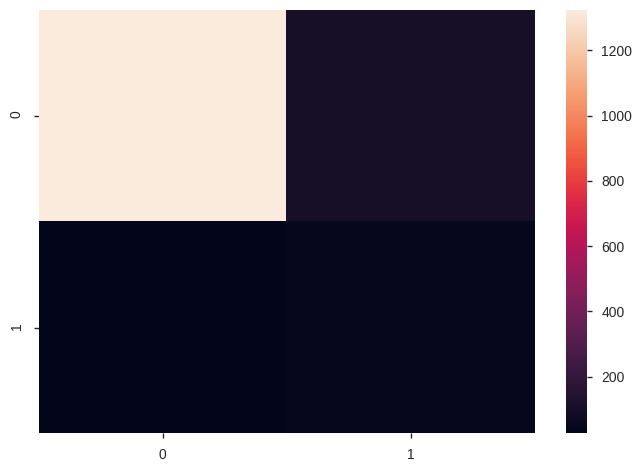

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yp,Yt)
sns.heatmap(cm)
plt.show()

In [68]:
from sklearn.metrics import classification_report

In [69]:
classification_report(yp,Yt)

'              precision    recall  f1-score   support\n\n           0       0.98      0.93      0.95      1431\n           1       0.29      0.62      0.39        69\n\n    accuracy                           0.91      1500\n   macro avg       0.63      0.77      0.67      1500\nweighted avg       0.95      0.91      0.93      1500\n'

In [70]:
!pip install yellowbrick

0.9113333333333333

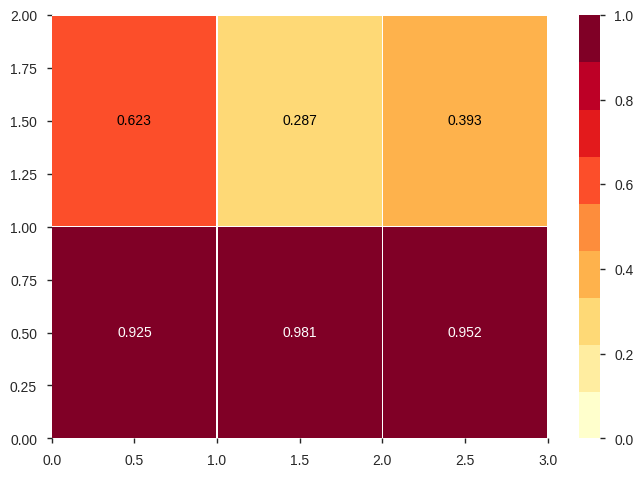

In [71]:
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(LR_model)
viz.fit(XT, YT)
viz.score(Xt, Yt)
#viz.show()

0.9113333333333333

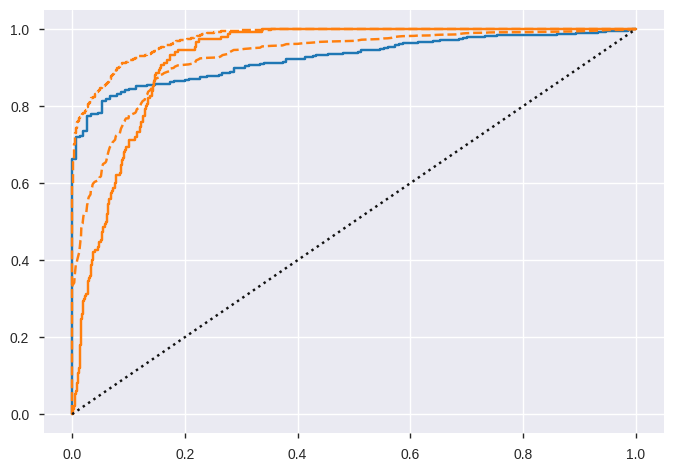

In [72]:
from yellowbrick.classifier import ROCAUC
viz = ROCAUC(LR_model)
viz.fit(XT, YT)
viz.score(Xt, Yt)
#viz.show()

In [73]:
#Blue ROC of class 0
#Dashed?? Green class 1
#Dashed micro averages

In [74]:
LR_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [75]:
#0.00001 to 10 alpha rates Learning rate high overfititng slow takes time

**Reasoning on how can the model perform better**

In [76]:
train_score = []
test_score = []
solver = ['newton-cg', 'saga', 'lbfgs','liblinear']
for i in [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:
  for j in solver:
    model = LogisticRegression(solver = j, C=i)
    model.fit(XT,YT)
    yp = model.predict(Xt)
    train_score.append(round(model.score(XT,YT),3))
    test_score.append(round(model.score(XT,YT),3))
print(solver)
print()
print(train_score)
print()
print(test_score)
print()
#Note that here we find that best performance is achieved when C = 1 and solver = 'saga'

['newton-cg', 'saga', 'lbfgs', 'liblinear']

[0.908, 0.906, 0.907, 0.907, 0.91, 0.906, 0.909, 0.909, 0.917, 0.906, 0.909, 0.909, 0.937, 0.906, 0.911, 0.909, 0.949, 0.906, 0.933, 0.909, 0.953, 0.906, 0.908, 0.909, 0.954, 0.906, 0.909, 0.909, 0.954, 0.906, 0.919, 0.909, 0.953, 0.906, 0.908, 0.909, 0.954, 0.906, 0.909, 0.909]

[0.908, 0.906, 0.907, 0.907, 0.91, 0.906, 0.909, 0.909, 0.917, 0.906, 0.909, 0.909, 0.937, 0.906, 0.911, 0.909, 0.949, 0.906, 0.933, 0.909, 0.953, 0.906, 0.908, 0.909, 0.954, 0.906, 0.909, 0.909, 0.954, 0.906, 0.919, 0.909, 0.953, 0.906, 0.908, 0.909, 0.954, 0.906, 0.909, 0.909]



In [77]:
import statsmodels.api as sm
X2 = sm.add_constant(XT)
regressor2 = sm.Logit(YT, X2).fit()
print("p-Values for each column: ")
print()
print(regressor2.pvalues)

Optimization terminated successfully.
         Current function value: 0.128714
         Iterations 9
p-Values for each column: 

const                0.01
ID                   0.14
Age                  0.96
Experience           0.84
Income               0.00
ZIP Code             0.31
Family               0.00
CCAvg                0.01
Education            0.00
Mortgage             0.34
Securities Account   0.00
CD Account           0.00
Online               0.00
CreditCard           0.00
dtype: float64


In [78]:
regressor2.summary

<bound method BinaryResults.summary of <statsmodels.discrete.discrete_model.LogitResults object at 0x7ff1bc157ef0>>

In [79]:
LR_model.predict_proba(XT)

array([[0.99783261, 0.00216739],
       [0.82979548, 0.17020452],
       [0.96328374, 0.03671626],
       ...,
       [0.7352263 , 0.2647737 ],
       [0.94086775, 0.05913225],
       [0.24331635, 0.75668365]])

In [80]:
pd.DataFrame(LR_model.predict(Xt))

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [81]:
model2 = SVC(kernel='linear')#Different Models

In [82]:
model2.fit(XT,YT)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [83]:
model.score(XT,YT)

0.9088571428571428

In [84]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors= 5 , weights = 'uniform' )
model.fit(XT, YT)
Yp=model.predict(Xt)
model.score(Xt, Yt)

0.8953333333333333

In [85]:
print(metrics.confusion_matrix(Yt, Yp))

[[1342    8]
 [ 149    1]]


**6. Business Understanding of the Model:**
Here by seeing the pvalues we find that Paramaters such as ID and Pin Code have very high Pvalues and hence are totally not significant

Also we Can Notice that Age and Experience are highly Correlated and hence Age can be dropped to avoid Overfitting

For 7th Question Please Open WebApp Folder